In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
!pip install pandas
import warnings
warnings.filterwarnings('ignore')

Defaulting to user installation because normal site-packages is not writeable


In [29]:
dataset = pd.read_csv("C:\\Users\\hp\\Desktop\\PAKUNP.csv")
dataset.head()

,Province,Division,District,Indicator,Area Type,Total,Male,Female
0,Balochistan,Kalat Division,Kalat,Working Age Population,Rural,130000,70000,59000
1,Balochistan,Kalat Division,Kalat,Working Age Population,Urban,28000,17000,12000
2,Balochistan,Kalat Division,Kalat,Labour Force,Rural,52600,49600,3100
3,Balochistan,Kalat Division,Kalat,Labour Force,Urban,10800,10600,300
4,Balochistan,Kalat Division,Kalat,Employed,Rural,49700,47400,2300


In [33]:
dataset.count() 

Province     4730
Division     4730
District     4730
Indicator    4730
Area Type    4730
Total        4730
Male         4730
Female       4730
dtype: int64

In [37]:
dataset.dropna(inplace=True)

In [39]:
dataset.columns.str.strip()

Index(['Province', 'Division', 'District', 'Indicator', 'Area Type', 'Total',
       'Male', 'Female'],
      dtype='object')

In [41]:
dataset.isnull().sum()

Province     0
Division     0
District     0
Indicator    0
Area Type    0
Total        0
Male         0
Female       0
dtype: int64

In [45]:
dataset.drop_duplicates(inplace=True)

In [47]:
print(dataset.shape)

(4706, 8)


In [49]:
dataset.describe()

,Province,Division,District,Indicator,Area Type,Total,Male,Female
count,4706,4706,4706,4706,4706,4706,4706,4706
unique,4,30,131,20,3,1838,1848,1626
top,Punjab,Quetta Division,Kalat,Working Age Population,Rural,-,-,-
freq,1330,396,36,262,2091,322,343,742


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4706 entries, 0 to 4705
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Province   4706 non-null   object
 1   Division   4706 non-null   object
 2   District   4706 non-null   object
 3   Indicator  4706 non-null   object
 4   Area Type  4706 non-null   object
 5   Total      4706 non-null   object
 6   Male       4706 non-null   object
 7   Female     4706 non-null   object
dtypes: object(8)
memory usage: 330.9+ KB


In [71]:
dataset.columns=dataset.columns.str.strip().str.lower()
print(dataset.columns)

Index(['province', 'division', 'district', 'indicator', 'area type', 'total',
       'male', 'female'],
      dtype='object')


In [ ]:
# Convert relevant columns to float
dataset['total'] = dataset['total'].astype(float)
dataset['male'] = dataset['male'].astype(float)
dataset['female'] = dataset['female'].astype(float)

In [89]:
dataset['total'] = dataset['total'].round(2)
dataset['male'] = dataset['male'].round(2)
dataset['female'] = dataset['female'].round(2)

In [103]:
print(dataset.head)

<bound method NDFrame.head of          province            division district               indicator  \
0     Balochistan      Kalat Division    Kalat  Working Age Population   
1     Balochistan      Kalat Division    Kalat  Working Age Population   
2     Balochistan      Kalat Division    Kalat            Labour Force   
3     Balochistan      Kalat Division    Kalat            Labour Force   
4     Balochistan      Kalat Division    Kalat                Employed   
...           ...                 ...      ...                     ...   
4701        Sindh  Hyderabad Division   Matiri        Total Population   
4702        Sindh   Banbhore Division  Thattah        Total Population   
4703        Sindh   Banbhore Division  Thattah        Total Population   
4704  Balochistan     Quetta Division   Lorali        Total Population   
4705  Balochistan     Quetta Division   Lorali        Total Population   

     area type   total    male  female  
0        Rural  130000   70000   59000  

In [105]:
employment_data = dataset[dataset['indicator'] == 'Employed']
unemployment_data = dataset[dataset['indicator'] == 'Labour Force']

In [107]:
merged_data = pd.merge(unemployment_data, employment_data, on=['province', 'division', 'district', 'area type'], suffixes=('_labour', '_employed'))

In [111]:
merged_data['total_labour'] = pd.to_numeric(merged_data['total_labour'], errors='coerce')
merged_data['total_employed'] = pd.to_numeric(merged_data['total_employed'], errors='coerce')

In [113]:
merged_data['unemployed'] = merged_data['total_labour'] - merged_data['total_employed']

In [129]:
merged_data['unemployed'] = merged_data['unemployed'].fillna(0)

In [131]:
print(merged_data)

        province         division  district indicator_labour area type  \
0    Balochistan   Kalat Division     Kalat     Labour Force     Rural   
1    Balochistan   Kalat Division     Kalat     Labour Force     Urban   
2    Balochistan   Kalat Division   Khuzdar     Labour Force     Rural   
3    Balochistan   Kalat Division   Khuzdar     Labour Force     Urban   
4    Balochistan   Kalat Division   Mastung     Labour Force     Rural   
..           ...              ...       ...              ...       ...   
257        Sindh  Sukkur Division    Ghotki     Labour Force     Urban   
258        Sindh  Sukkur Division  Khairpur     Labour Force     Rural   
259        Sindh  Sukkur Division  Khairpur     Labour Force     Urban   
260        Sindh  Sukkur Division    Sukkur     Labour Force     Rural   
261        Sindh  Sukkur Division    Sukkur     Labour Force     Urban   

     total_labour male_labour female_labour indicator_employed  \
0         52600.0       49600          3100  

In [133]:
merged_data.to_csv('merged_data_with_unemployment.csv', index=False)

In [169]:
print("Columns in dataset:", merged_data.columns.tolist())


Columns in dataset: ['province', 'division', 'district', 'indicator_labour', 'area type', 'total_labour', 'male_labour', 'female_labour', 'indicator_employed', 'total_employed', 'male_employed', 'female_employed', 'unemployed']


In [179]:
mean_unemployment_rate = merged_data.groupby(['province', 'division', 'district'])['unemployed'].mean()
mean_employed = merged_data.groupby(['province', 'division', 'district'])['total_employed'].mean()

# Find districts with maximum and minimum unemployment rates
max_unemployed_district = mean_unemployment_rate.idxmax()
min_unemployed_district = mean_unemployment_rate.idxmin()

# Find districts with maximum and minimum employed individuals
max_employed_district = mean_employed.idxmax()
min_employed_district = mean_employed.idxmin()

# Calculate overall max and min unemployment rates
max_unemployment_rate = merged_data['unemployed'].max()
min_unemployment_rate = merged_data['unemployed'].min()

# Print the results
print("The Province and District with the maximum unemployment rate is:", max_unemployed_district)
print("The Province and District with the minimum unemployment rate is:", min_unemployed_district)
print("The Province and District with the maximum employed individuals is:", max_employed_district)
print("The Province and District with the minimum employed individuals is:", min_employed_district)
print("Maximum unemployment rate in the dataset is:", max_unemployment_rate)
print("Minimum unemployment rate in the dataset is:", min_unemployment_rate)

The Province and District with the maximum unemployment rate is: ('Punjab', 'Lahore Division', 'Lahore')
The Province and District with the minimum unemployment rate is: ('Balochistan', 'Quetta Division', 'Chagai')
The Province and District with the maximum employed individuals is: ('Punjab', 'Lahore Division', 'Lahore')
The Province and District with the minimum employed individuals is: ('Balochistan', 'Quetta Division', 'Harnai')
Maximum unemployment rate in the dataset is: 347100.0
Minimum unemployment rate in the dataset is: 0.0


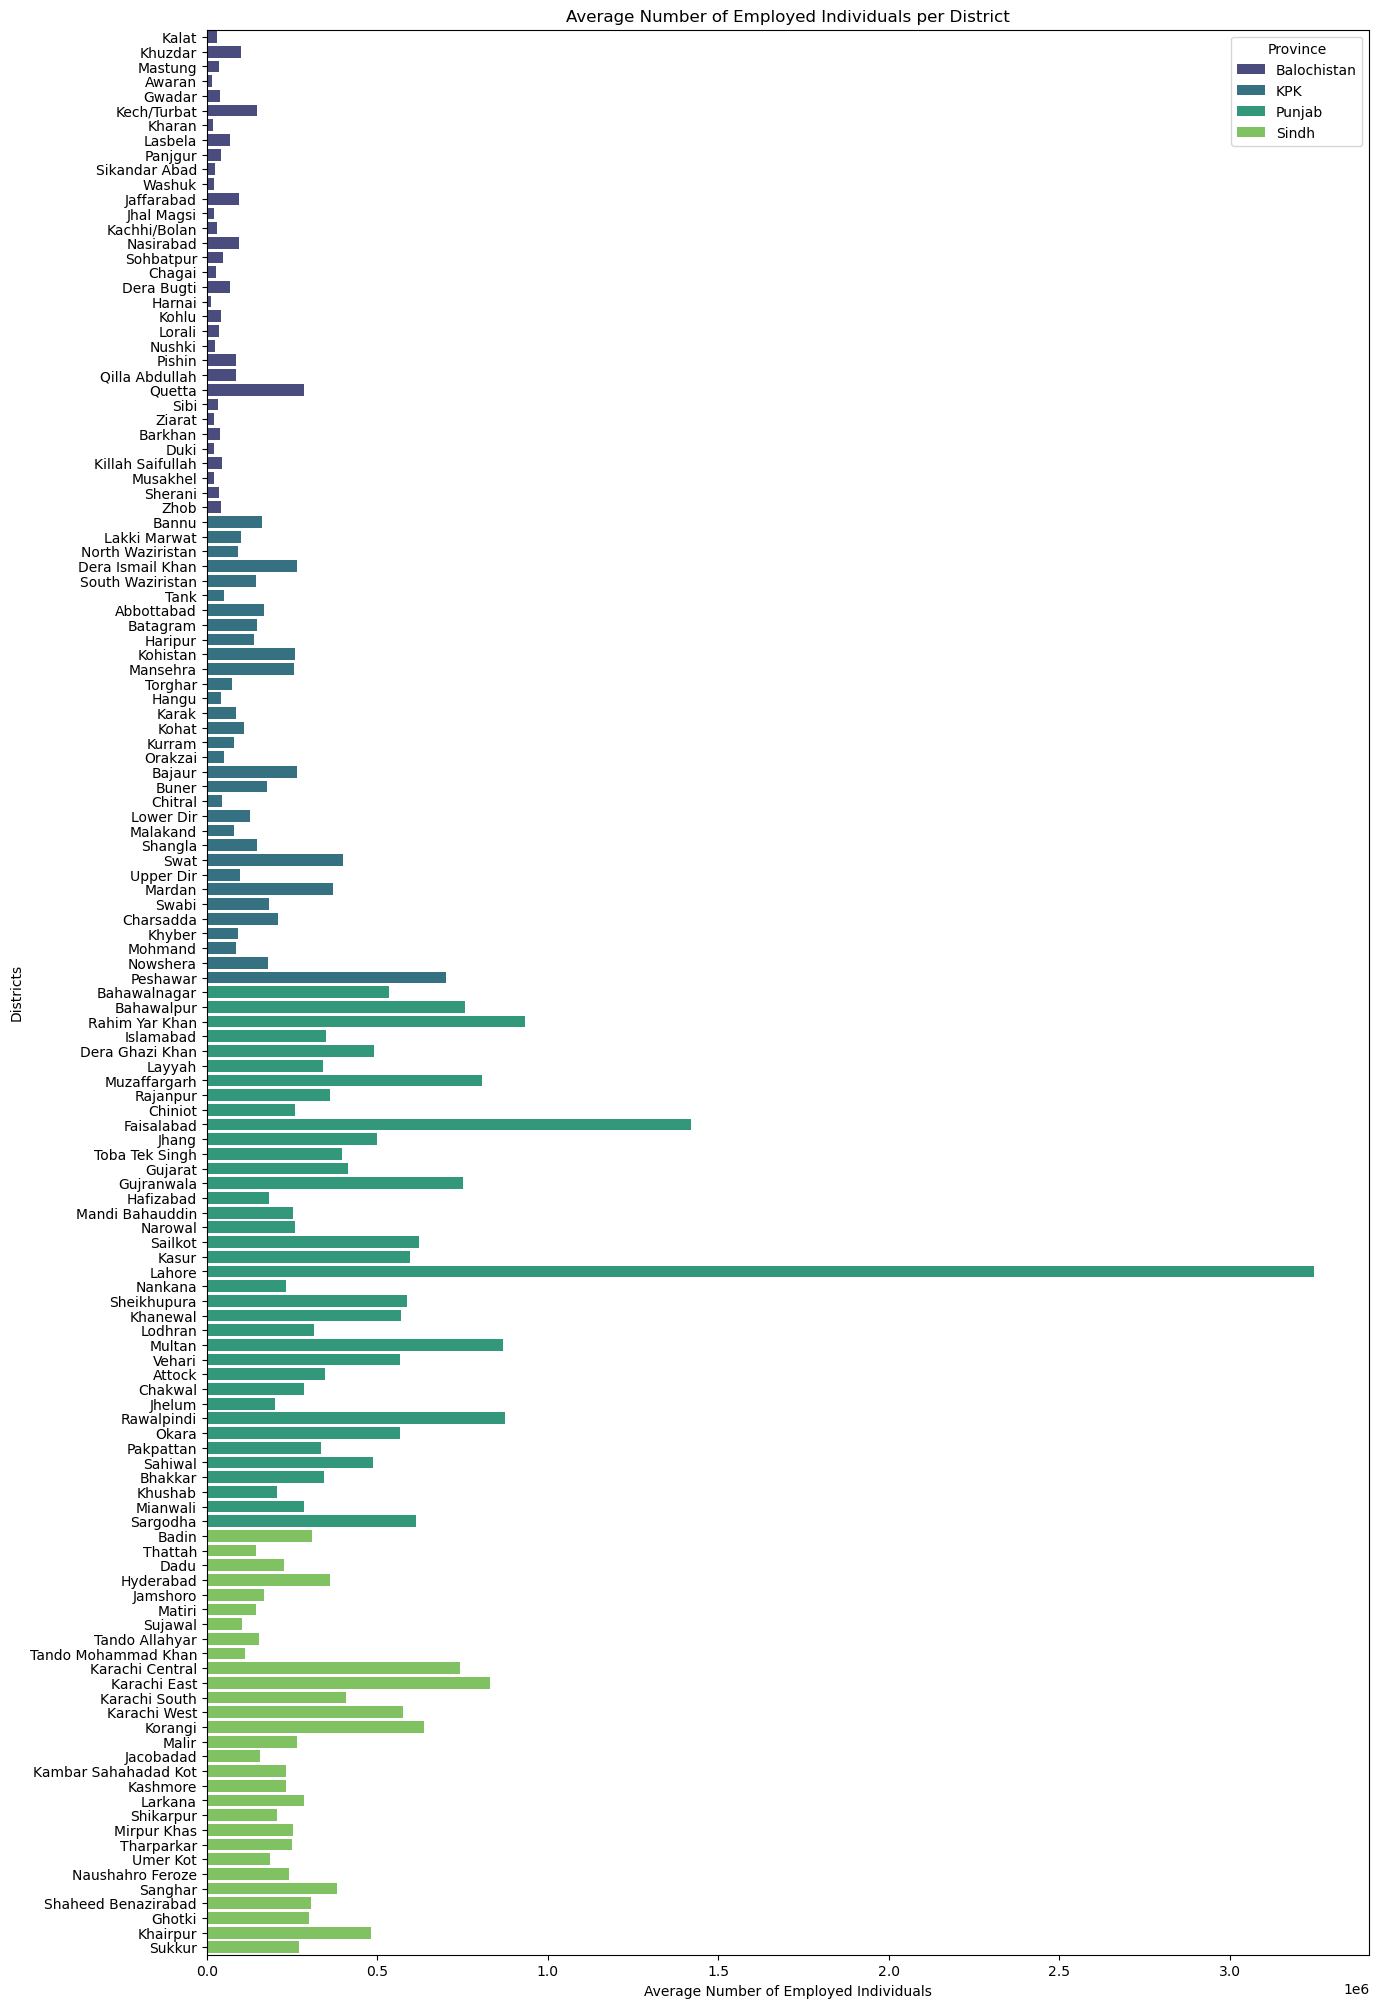

In [207]:
import matplotlib.pyplot as plt
import seaborn as sns
mean_employed = merged_data.groupby(['province', 'division', 'district'])['total_employed'].mean().reset_index()
plt.figure(figsize=(15, 25)) 
# Plotting the average number of employed individuals per district with hue for province
sns.barplot(x='total_employed', y='district', hue='province', data=mean_employed, palette='viridis')
plt.title('Average Number of Employed Individuals per District')
plt.xlabel('Average Number of Employed Individuals')
plt.ylabel('Districts')
plt.legend(title='Province')
plt.show()


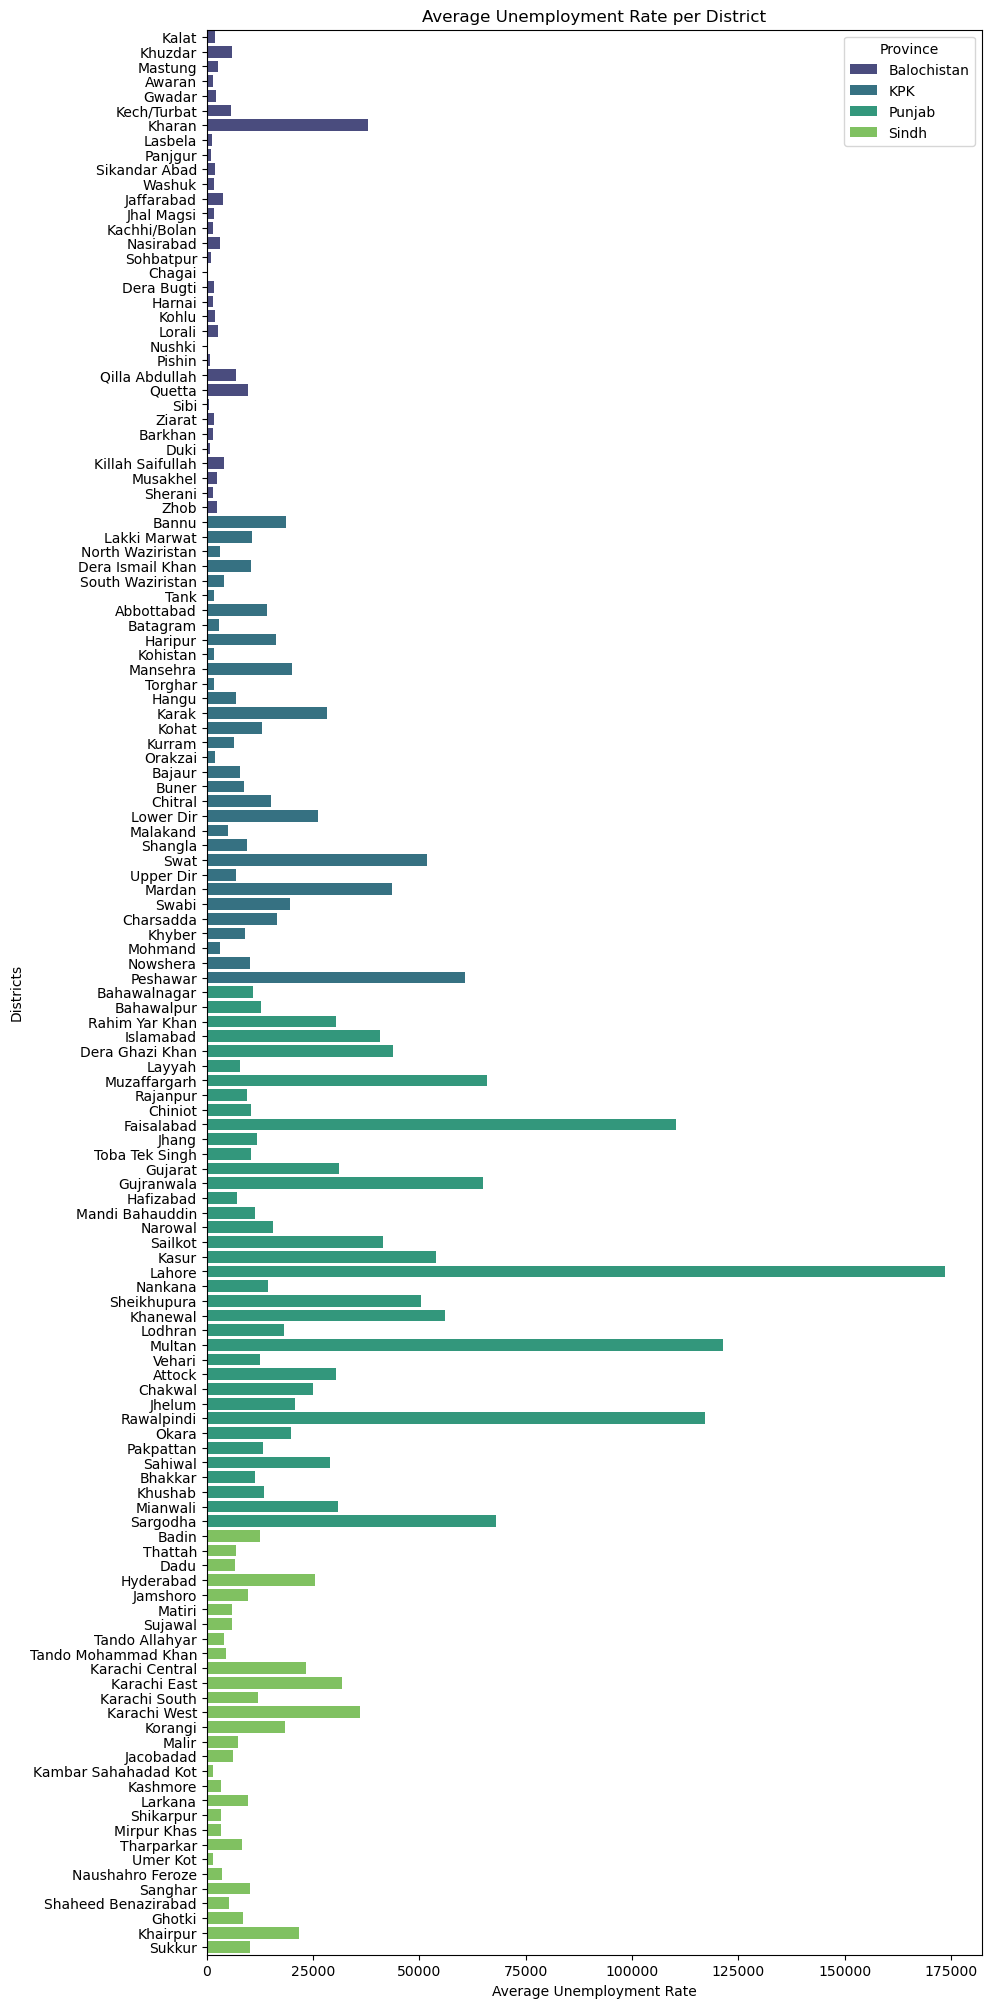

In [223]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_unemployment_rate = merged_data.groupby(['province', 'division', 'district'])['unemployed'].mean().reset_index()
plt.figure(figsize=(10, 25))  
sns.barplot(x='unemployed', y='district', hue='province', data=mean_unemployment_rate, palette='viridis')
plt.title('Average Unemployment Rate per District')
plt.xlabel('Average Unemployment Rate')
plt.ylabel('Districts')
plt.legend(title='Province')
plt.show()

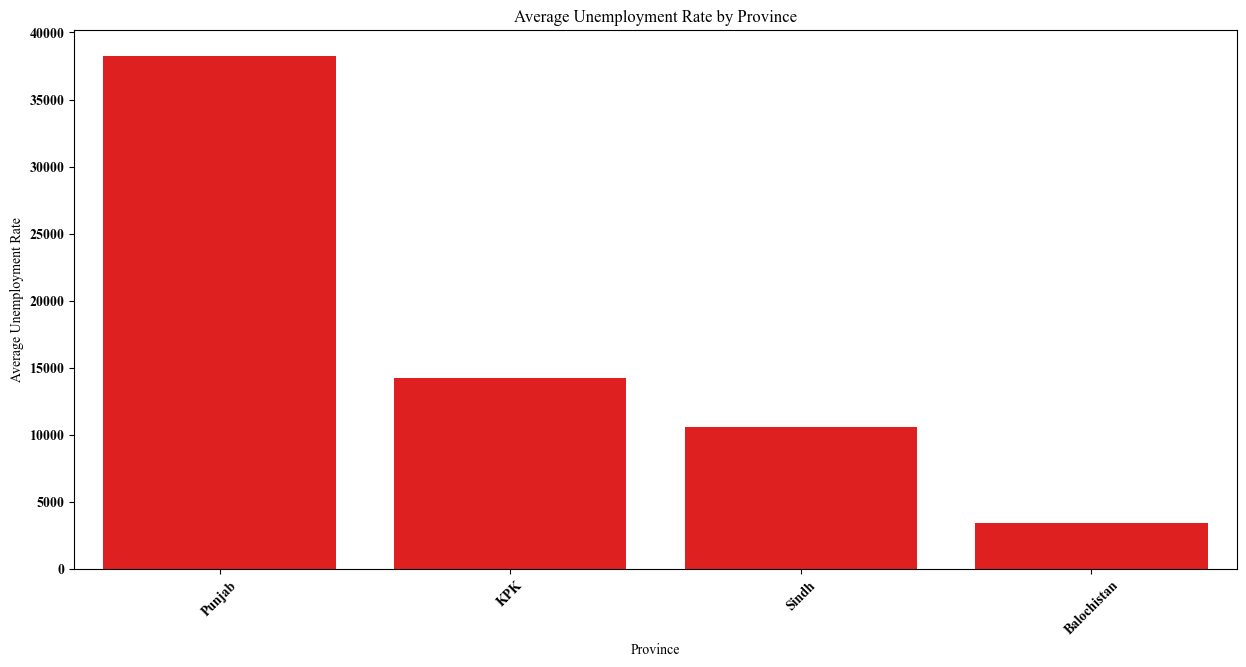

In [275]:
import matplotlib.pyplot as plt
import seaborn as sns

mean_unemployment_province = merged_data.groupby('province')['unemployed'].mean().reset_index()
mean_unemployment_province = mean_unemployment_province.sort_values(by='unemployed', ascending=False)

plt.rcParams['font.family'] = 'Times New Roman'
plt.figure(figsize=(15, 7))
sns.barplot(x='province', y='unemployed', data=mean_unemployment_province,color='Red')
plt.title('Average Unemployment Rate by Province')
plt.xlabel('Province')
plt.ylabel('Average Unemployment Rate')
plt.xticks(rotation=45)
plt.legend([],[], frameon=False)  
plt.show()

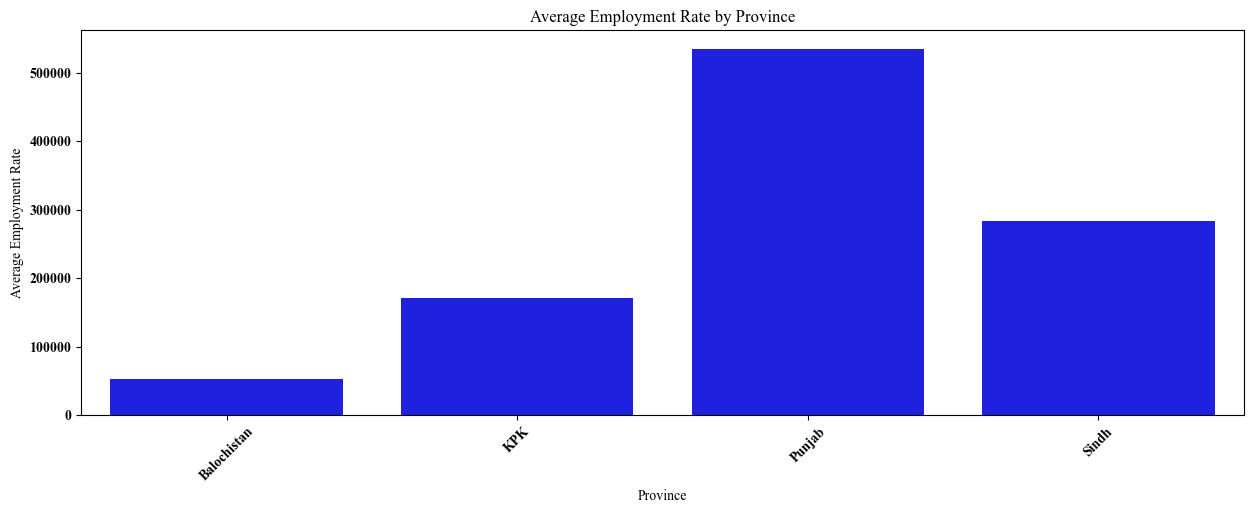

In [277]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'Times New Roman'  

mean_employed_province = merged_data.groupby('province')['total_employed'].mean().reset_index()

plt.figure(figsize=(15, 5))
sns.barplot(x='province', y='total_employed', data=mean_employed_province,color='Blue')
plt.title('Average Employment Rate by Province')
plt.xlabel('Province')
plt.ylabel('Average Employment Rate')
plt.xticks(rotation=45)
plt.legend([], [], frameon=False)  
plt.show()



In [285]:
mean_province_unemployment = merged_data.groupby('province')['unemployed'].mean()
print(mean_province_unemployment)

province
Balochistan     3472.727273
KPK            14234.375000
Punjab         38255.405405
Sindh          10591.379310
Name: unemployed, dtype: float64


In [295]:
mean_districts_unemployment = merged_data.groupby('district')['unemployed'].mean()
print(mean_districts_unemployment)
print(merged_data.columns)

district
Abbottabad      14100.0
Attock          30450.0
Awaran           1450.0
Badin           12500.0
Bahawalnagar    10800.0
                 ...   
Upper Dir        6950.0
Vehari          12500.0
Washuk           1750.0
Zhob             2500.0
Ziarat           1800.0
Name: unemployed, Length: 131, dtype: float64
Index(['province', 'division', 'district', 'indicator_labour', 'area type',
       'total_labour', 'male_labour', 'female_labour', 'indicator_employed',
       'total_employed', 'male_employed', 'female_employed', 'unemployed'],
      dtype='object')


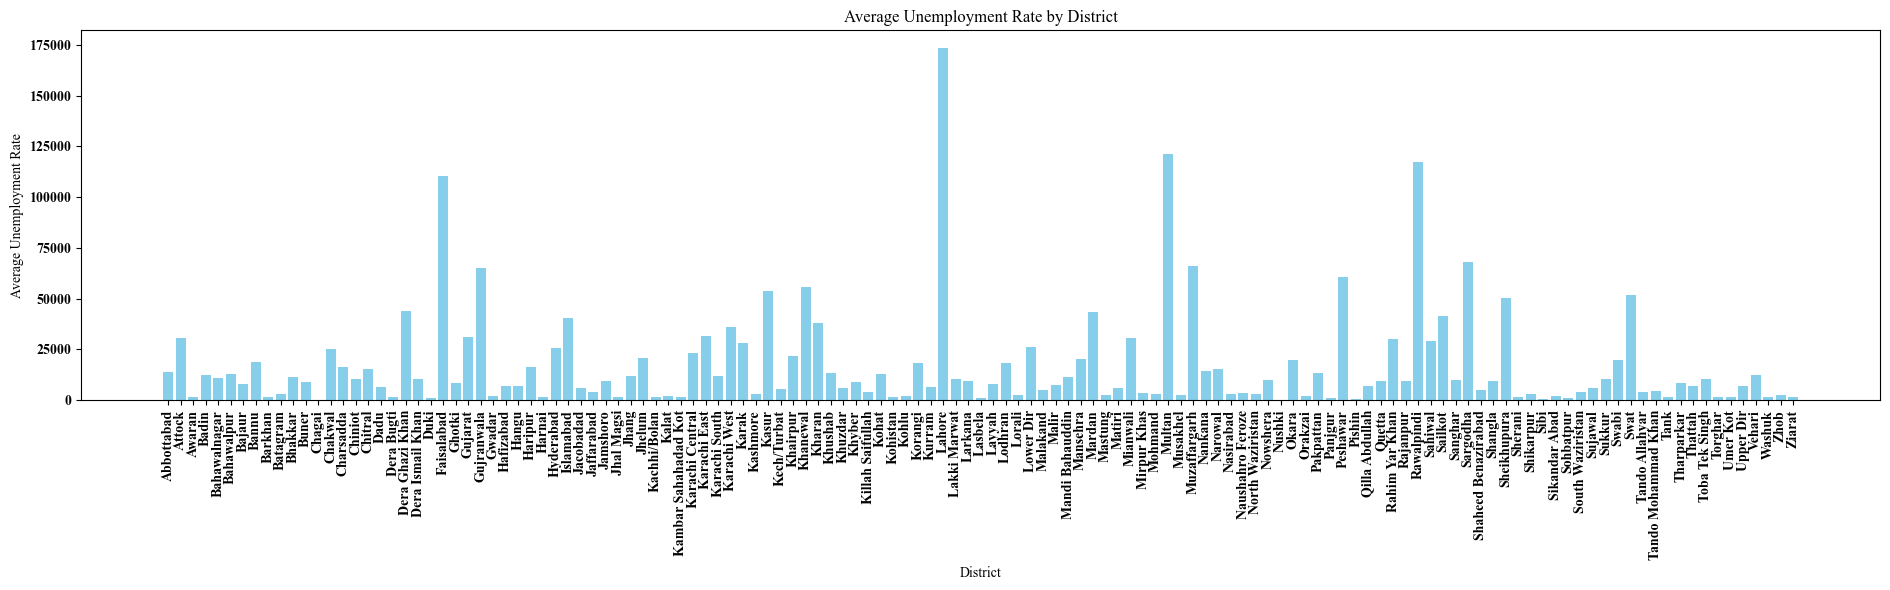

In [327]:
districts = mean_districts_unemployment.index
avg_rates = mean_districts_unemployment.values

plt.figure(figsize=(19,6))
plt.bar(districts, avg_rates, color='skyblue')
plt.xlabel('District')
plt.ylabel('Average Unemployment Rate')
plt.title('Average Unemployment Rate by District')
plt.xticks(rotation=90)  
plt.tight_layout()  
plt.show()

In [329]:
print(merged_data.columns)

Index(['province', 'division', 'district', 'indicator_labour', 'area type',
       'total_labour', 'male_labour', 'female_labour', 'indicator_employed',
       'total_employed', 'male_employed', 'female_employed', 'unemployed'],
      dtype='object')


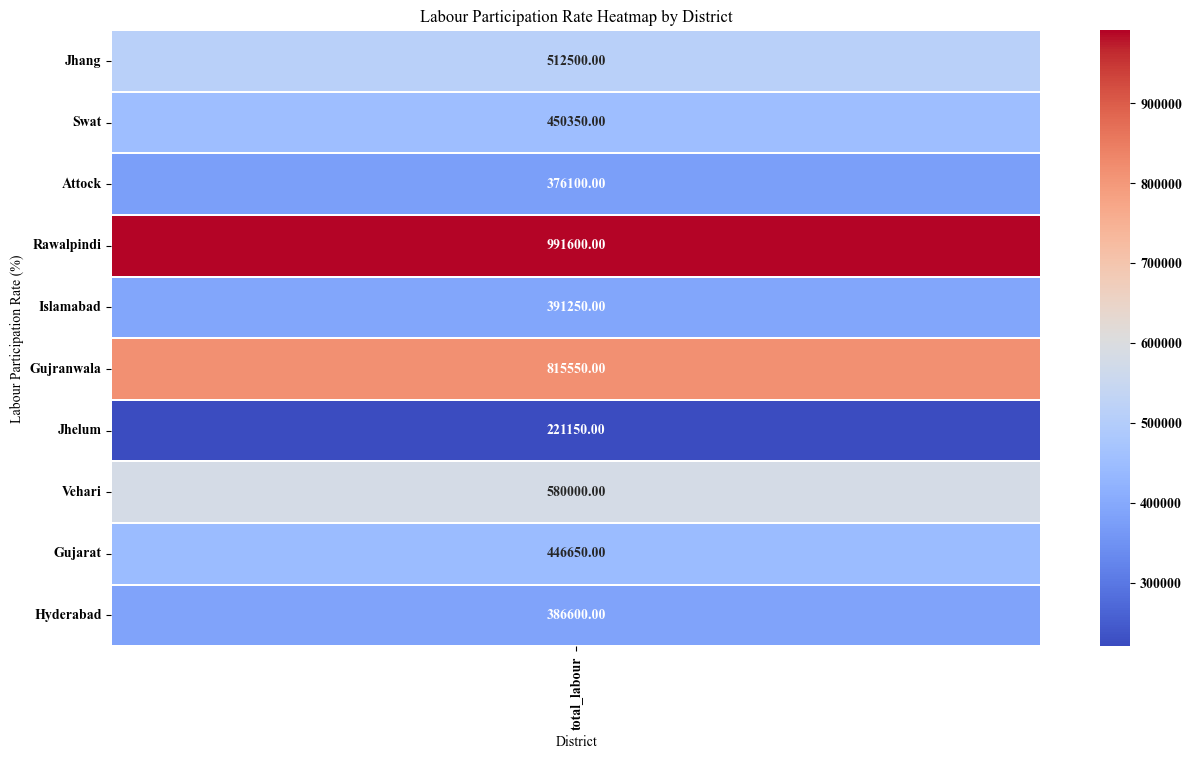

In [355]:
main_districts = ['Jhang', 'Swat', 'Attock', 'Rawalpindi',  
    'Islamabad', 'Gujranwala', 'Jhelum', 'Vehari', 'Gujarat' , 'Hyderabad']

heatmap_data = merged_data.pivot_table(index='district', values='total_labour', aggfunc='mean')
heatmap_data = heatmap_data.loc[main_districts]  

plt.figure(figsize=(15, 8)) 
sns.heatmap(heatmap_data, cmap='coolwarm', annot=True, fmt=".2f", linewidths=0.2)
plt.title("Labour Participation Rate Heatmap by District")
plt.xlabel("District")
plt.ylabel("Labour Participation Rate (%)")
plt.xticks(rotation=90)
plt.yticks(rotation=0)
plt.show()

In [357]:
dataset.head()

,province,division,district,indicator,area type,total,male,female
0,Balochistan,Kalat Division,Kalat,Working Age Population,Rural,130000,70000,59000
1,Balochistan,Kalat Division,Kalat,Working Age Population,Urban,28000,17000,12000
2,Balochistan,Kalat Division,Kalat,Labour Force,Rural,52600,49600,3100
3,Balochistan,Kalat Division,Kalat,Labour Force,Urban,10800,10600,300
4,Balochistan,Kalat Division,Kalat,Employed,Rural,49700,47400,2300


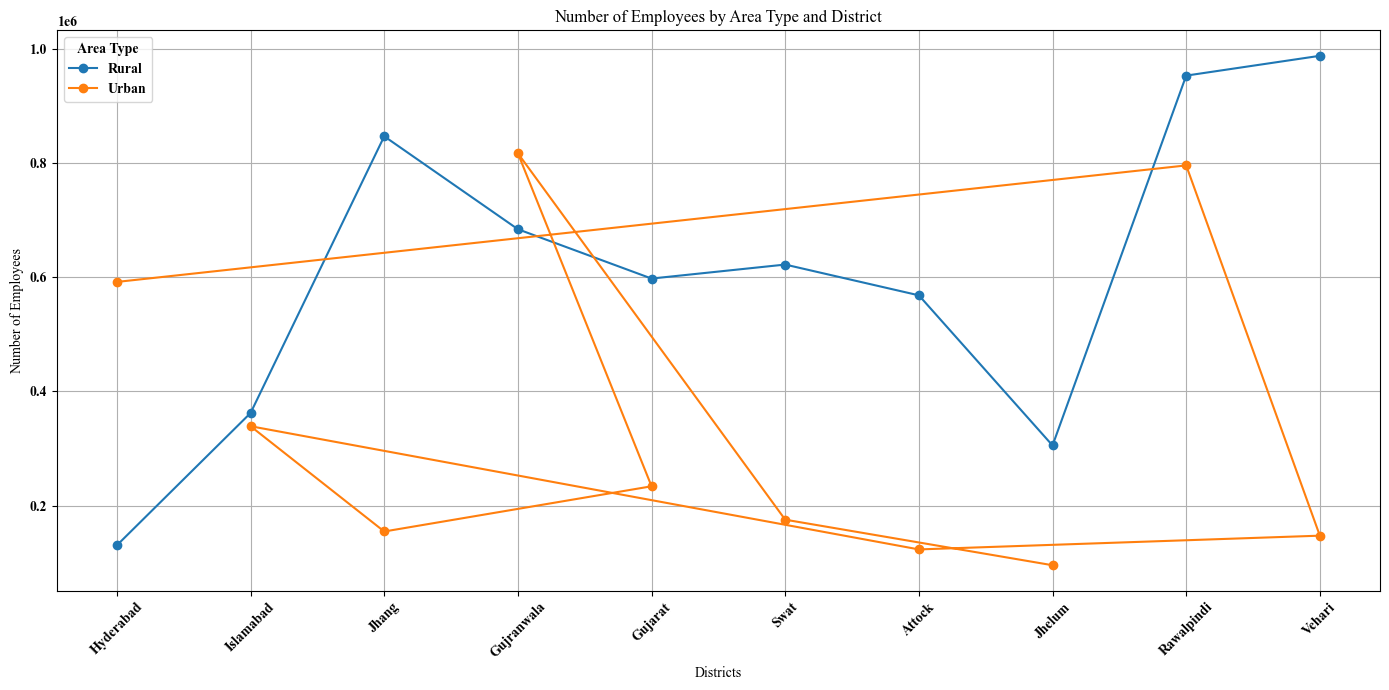

In [375]:

specific_districts = ['Jhang', 'Swat', 'Attock', 'Rawalpindi',  
    'Islamabad', 'Gujranwala', 'Jhelum', 'Vehari', 'Gujarat' , 'Hyderabad']

filtered_data = merged_data[merged_data['district'].isin(specific_districts)]

filtered_data = filtered_data.sort_values(by='area type')  

plt.figure(figsize=(14, 7))

for area in filtered_data['area type'].unique():
    area_data = filtered_data[filtered_data['area type'] == area]
    plt.plot(area_data['district'], area_data['total_employed'], marker='o', label=area)

plt.xlabel('Districts')
plt.ylabel('Number of Employees')
plt.title('Number of Employees by Area Type and District')
plt.legend(title='Area Type')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

plt.show()


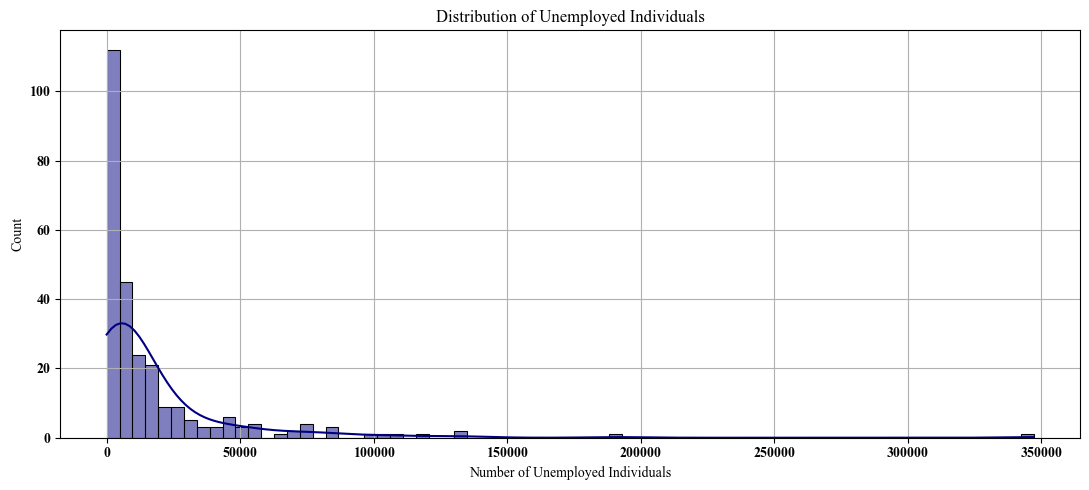

In [419]:
plt.figure(figsize=(11, 5))
sns.histplot(data=merged_data, x="unemployed", kde=True, color="navy")
plt.title('Distribution of Unemployed Individuals')
plt.xlabel('Number of Unemployed Individuals')
plt.ylabel('Count')
plt.grid(True)
plt.tight_layout()
plt.show()

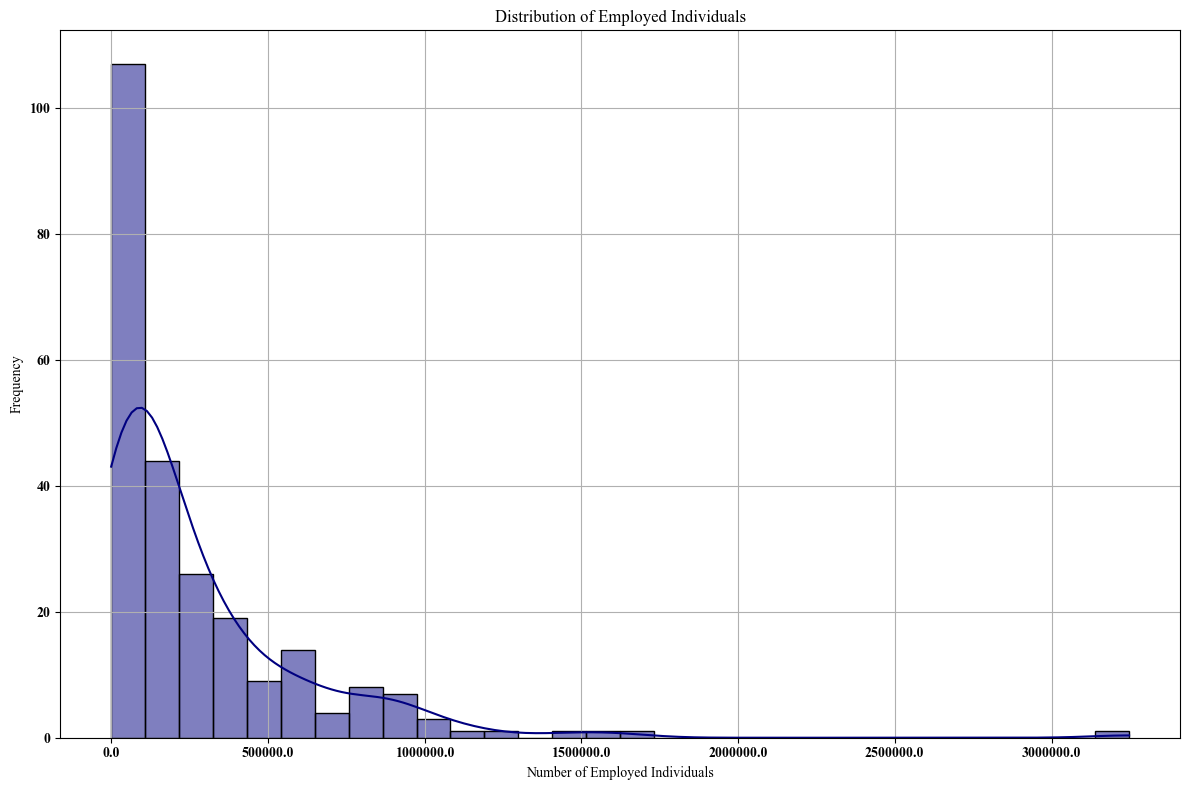

In [425]:
import matplotlib.ticker as ticker

plt.figure(figsize=(12, 8))
sns.histplot(data=merged_data, x="total_employed", kde=True, color="navy", bins=30)
plt.title('Distribution of Employed Individuals')
plt.xlabel('Number of Employed Individuals')
plt.ylabel('Frequency')
plt.grid(True)

plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))

plt.tight_layout()
plt.show()


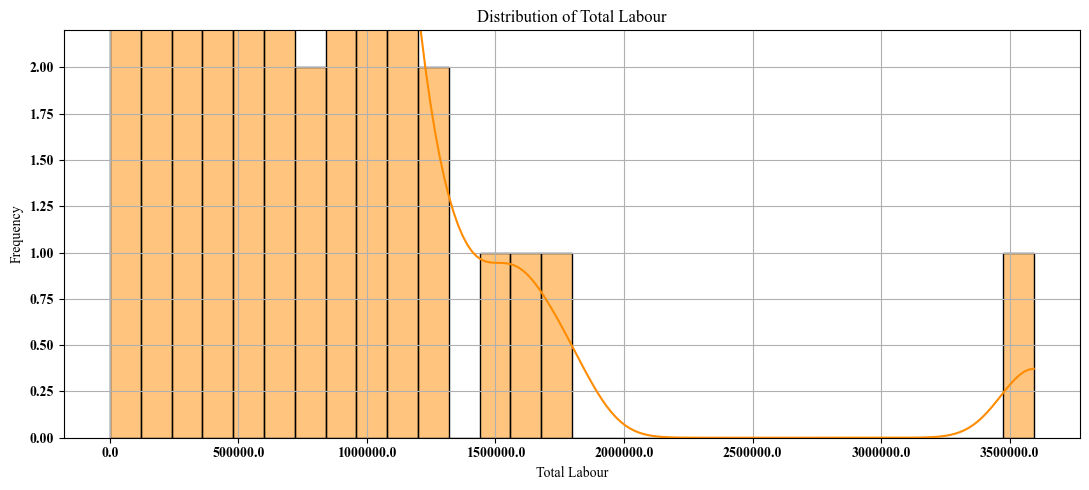

In [441]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.ticker as ticker

plt.figure(figsize=(11,5))
sns.histplot(data=merged_data, x="total_labour", kde=True, color="darkorange", bins=30)  # Adjust bins for finer resolution
plt.title('Distribution of Total Labour')
plt.xlabel('Total Labour')
plt.ylabel('Frequency')
plt.grid(True)

plt.gca().xaxis.set_major_formatter(ticker.FormatStrFormatter('%.1f'))
plt.ylim(0, merged_data['total_labour'].value_counts().max() * 1.1)

plt.tight_layout()
plt.show()


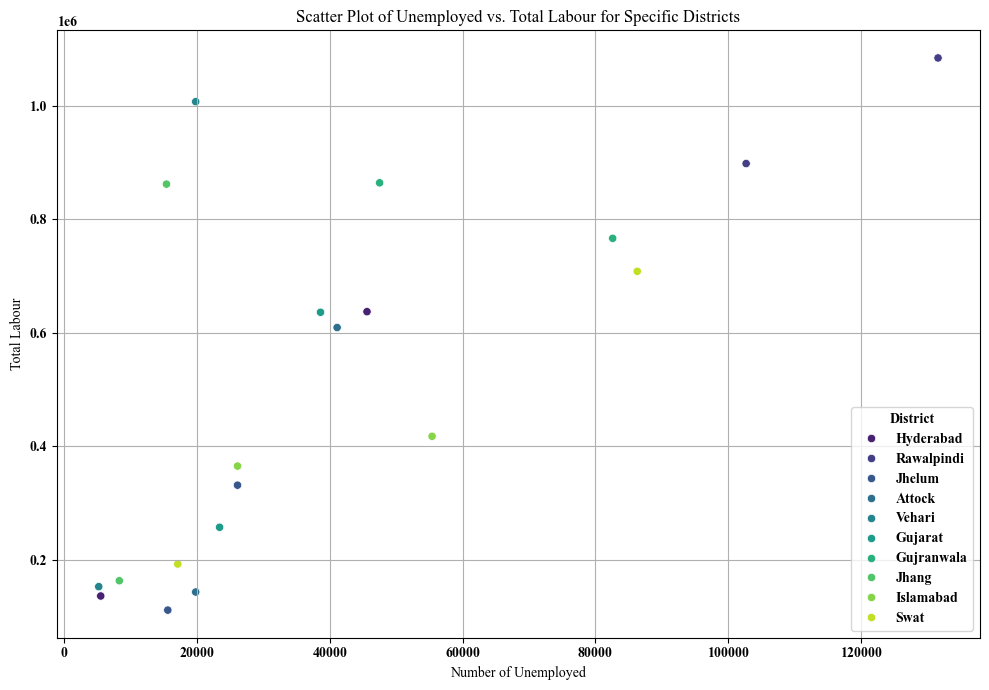

In [458]:
plt.figure(figsize=(10, 7))
specific_districts = ['Jhang', 'Swat', 'Attock', 'Rawalpindi',  
                      'Islamabad', 'Gujranwala', 'Jhelum', 'Vehari', 'Gujarat', 'Hyderabad']
filtered_data = merged_data[merged_data['district'].isin(specific_districts)]
sns.scatterplot(data=filtered_data, x="unemployed", y="total_labour", hue="district", palette='viridis')
plt.title('Scatter Plot of Unemployed vs. Total Labour for Specific Districts')
plt.xlabel('Number of Unemployed')
plt.ylabel('Total Labour')
plt.legend(title='District')
plt.grid(True)
plt.tight_layout()
plt.show()
